In [ ]:
!pip install mtcnn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import mtcnn.mtcnn as mtcnn
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

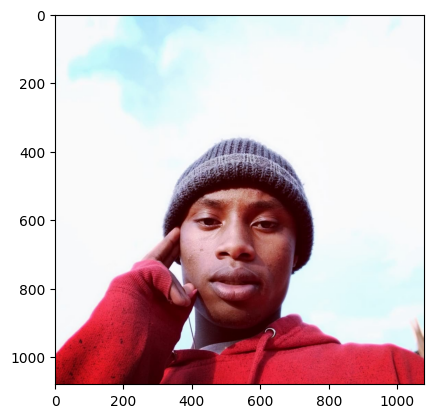

In [ ]:
image = cv.imread("/content/drive/MyDrive/Test/test.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)

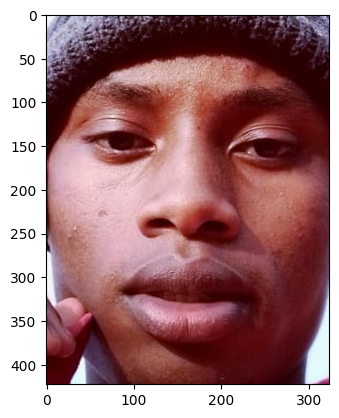

In [ ]:
detector = mtcnn.MTCNN()
detected_face = detector.detect_faces(image)
x, y, w, h = detected_face[0]["box"]
x, y = abs(x), abs(y)
face = image[y:y+h, x:x+w]
plt.imshow(face)

Loaded Successfully: 15 images for class 'Stan'
Loaded Successfully: 15 images for class 'Ian'
Loaded Successfully: 13 images for class 'Jeff'
Loaded Successfully: 12 images for class 'Peter'


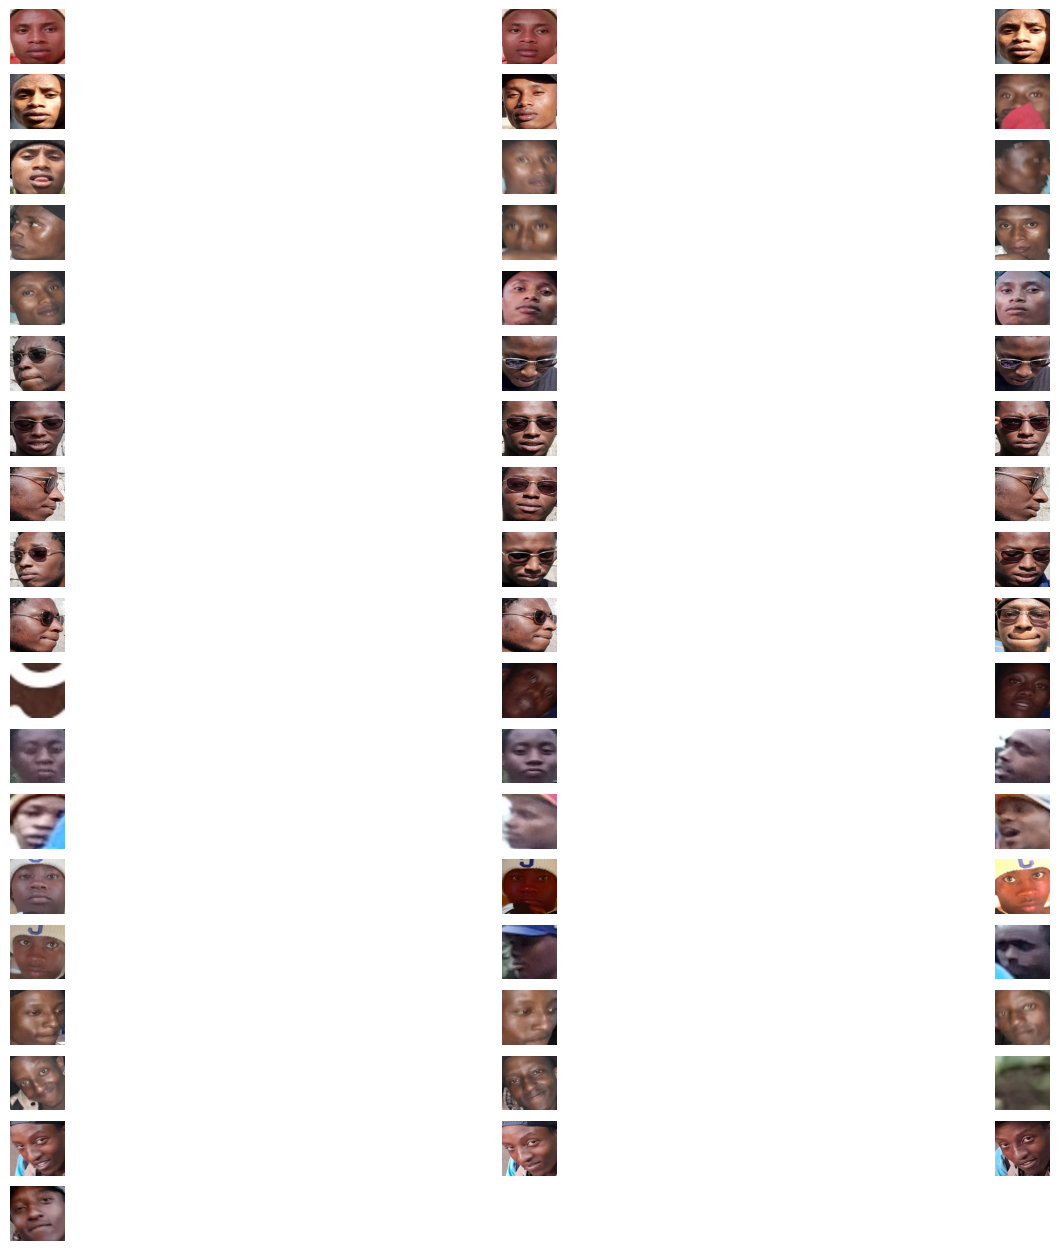

In [ ]:
import os
import cv2 as cv
import numpy as np
from mtcnn import MTCNN
import matplotlib.pyplot as plt

class FaceLoading:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160, 160)
        self.X = []
        self.y = []
        self.detector = MTCNN()

    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        faces = self.detector.detect_faces(img)
        if faces:
            x, y, w, h = faces[0]['box']
            x, y = abs(x), abs(y)
            face = img[y: y + h, x: x + w]
            face_arr = cv.resize(face, self.target_size)
            return face_arr
        else:
            return None

    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            path = os.path.join(dir, im_name)
            try:
                single_face = self.extract_face(path)
                if single_face is not None:
                    FACES.append(single_face)
            except Exception as e:
                print(f"Error loading {im_name}: {e}")
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = os.path.join(self.directory, sub_dir)
            if os.path.isdir(path):
                FACES = self.load_faces(path)
                labels = [sub_dir] * len(FACES)
                print(f"Loaded Successfully: {len(labels)} images for class '{sub_dir}'")
                self.X.extend(FACES)
                self.y.extend(labels)
        return np.asarray(self.X), np.asarray(self.y)

    def plot_images(self):
        plt.figure(figsize=(18, 16))
        ncols = 3
        nrows = len(self.y) // ncols + 1
        for num, img in enumerate(self.X):
            plt.subplot(nrows, ncols, num + 1)
            plt.imshow(img)
            plt.axis('off')
        plt.show()

# Example usage:
directory = "/content/drive/MyDrive/Images"
face_loader = FaceLoading(directory)
X, y = face_loader.load_classes()
face_loader.plot_images()


In [ ]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embeddings(face_img):
    # 3D (160 * 160 * 3)
    face_img = face_img.astype('float32')
    face_img = np.expand_dims(face_img, axis=0)

    # 4D (None * 160 * 160 * 3)
    yhat = embedder.embeddings(face_img)

    # 512D image (1 * 1 * 512)
    return yhat[0]

In [ ]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embeddings(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [ ]:
y

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
os.path.exists("/content/drive/MyDrive/Images")

True

In [ ]:
os.listdir("/content/drive/MyDrive/Images")

['Stan', 'Ian', 'Jeff', 'Peter']

In [ ]:
EMBEDDED_X.shape

(55, 512)

In [ ]:
y.shape

(55,)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(EMBEDDED_X, y, test_size=0.2, shuffle = True, random_state=42)

In [ ]:
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

Train Accuracy: 1.0
Test Accuracy: 0.8181818181818182


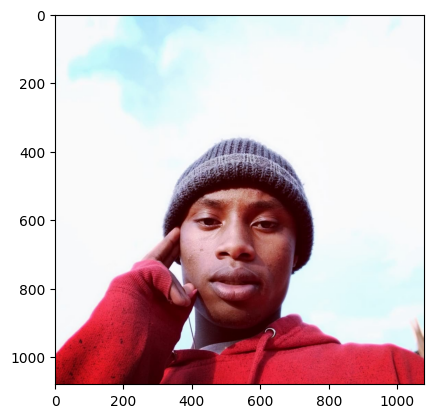

In [ ]:
test_img = cv.imread("/content/drive/MyDrive/Test/test.jpg")
test_img = cv.cvtColor(test_img, cv.COLOR_BGR2RGB)
plt.imshow(test_img)

In [ ]:
x, y, w, h = detector.detect_faces(test_img)[0]["box"]
x, y = abs(x), abs(y)
face = test_img[y:y+h, x:x+w]
face = cv.resize(face, (160, 160))
face  = get_embeddings(face)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [ ]:
face = [face]
y_pred = model.predict(face)
y_pred = encoder.inverse_transform(y_pred)
y_pred

array(['Stan'], dtype='<U5')